In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.7 MB/s eta 0:00:00


In [ ]:
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
from matplotlib.animation import FuncAnimation
import random

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import mne
import pandas as pd

#Stanford 6 minimal (Control) PHQ_1000 = 0
#Stanford 21 Severe PHQ_1000 = 20



edf_file_path_49 = '/content/drive/MyDrive/Data/STNF00049.edf'
edf_file_path_52 = '/content/drive/MyDrive/Data/STNF00052.edf'
edf_file_path_43 = '/content/drive/MyDrive/Data/STNF00043.edf'
edf_file_path_01 = '/content/drive/MyDrive/Data/STNF00001.edf'
edf_file_path_142 = '/content/drive/MyDrive/STANFORD/STNF00142.edf' #severe depression according to phq
raw_1 = mne.io.read_raw_edf(edf_file_path_01, preload=False, include = 'ECG')
raw_43 = mne.io.read_raw_edf(edf_file_path_43, preload=False, include = 'ECG')
raw_49 = mne.io.read_raw_edf(edf_file_path_49, preload=False, include = 'ECG')
raw_52 = mne.io.read_raw_edf(edf_file_path_52, preload=False, include = 'ECG')
raw_142 = mne.io.read_raw_edf(edf_file_path_142, preload=False, include = 'ECG')


data_1 = raw_1.get_data()
data_43 = raw_43.get_data()
data_49 = raw_49.get_data()
data_52 = raw_52.get_data()
data_142 = raw_52.get_data()
channels = raw_1.ch_names
df_1 = pd.DataFrame(data_1.T, columns=channels)
df_43 = pd.DataFrame(data_43.T, columns=channels)
df_49 = pd.DataFrame(data_49.T, columns=channels)
df_52 = pd.DataFrame(data_52.T,columns = channels)
df_142 = pd.DataFrame(data_142.T,columns = channels)

In [ ]:
#Video 1

import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.signal as signal

def create_ecg_video(data, sfreq):
    video_duration = 100  # seconds
    interval_ms = 400  # ms
    window_duration = 1.5  # seconds
    num_frames = int((video_duration) / window_duration)
    samples_per_frame = int(window_duration * sfreq)
    samples_per_interval = int(interval_ms / 1000 * sfreq)

    def update(frame):
        start_sample = frame * samples_per_frame
        end_sample = start_sample + samples_per_frame
        time_seconds = np.linspace(frame * samples_per_frame, frame * samples_per_frame + samples_per_frame, samples_per_frame)
        time_seconds = time_seconds / sfreq
        print(frame)

        # Clear the previous plot
        plt.clf()

        # Plot the ECG signal
        plt.plot(time_seconds, data[0, start_sample:end_sample], label='ECG Signal')
        plt.xlabel('Time (seconds)')
        plt.ylabel('ECG Signal')
        plt.title('ECG Signal')
        plt.grid(True)
        plt.ylim([-900, 1700])

        # Detect R peaks and plot them as red dots
        ecg_signal_segment = data[0, start_sample:end_sample]
        peaks, _ = signal.find_peaks(ecg_signal_segment, height=600)  # Adjust the height threshold as needed

        # Convert peak indices to time values
        peak_times = time_seconds[peaks]

        # Mark R peaks as red dots
        plt.scatter(peak_times, ecg_signal_segment[peaks], c='red', marker='o', label='R Peaks')

        # Show the legend
        plt.legend()

    fig = plt.figure(figsize=(10, 4))
    ani = FuncAnimation(fig, update, frames=num_frames, interval=interval_ms)

    ani.save('/content/drive/MyDrive/Data/ecg_video_final_142_Rpeaks.mp4', writer='ffmpeg', fps=1000 / interval_ms)
    plt.close()
    print("Video saved as 'ecg_video_final_49.mp4'")

sfreq = raw_49.info["sfreq"]
create_ecg_video(data_142, sfreq)


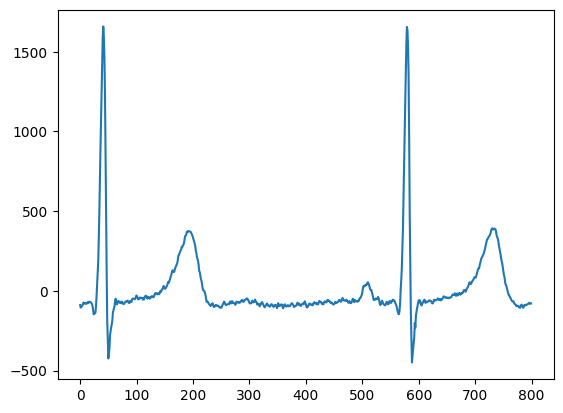

In [ ]:
plt.plot(data_142[0,1195000:1195800])

In [ ]:
#Video 2
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


data_49 = raw_49.get_data()

channels = raw_49.ch_names

df_49 = pd.DataFrame(data_49.T, columns=channels)


def create_ecg_video1(data, sfreq):
    video_duration = 5  # seconds
    interval_ms = 100 #ms
    window_duration = 2 #seconds
    #num_frames = int((video_duration) / window_duration)
    num_frames = int((video_duration*1000) / interval_ms)

    samples_per_frame = int(window_duration * sfreq)
    #samples_per_interval = int(interval_ms  * sfreq)
    samples_per_interval = int((interval_ms / 1000) * sfreq)


    def update1(frame):
        start_sample = frame * samples_per_interval
        end_sample = start_sample + samples_per_frame
        time_seconds = np.linspace(frame * window_duration, frame * window_duration + window_duration, samples_per_frame)
        #time_seconds = time_seconds/sfreq
        print(start_sample)
        print(end_sample)

        plt.clf()
        plt.plot(time_seconds, data[0, start_sample:end_sample])
        plt.xlabel('Time (seconds)')
        plt.ylabel('ECG Signal')
        plt.title('ECG Signal')
        plt.grid(True)

    fig = plt.figure(figsize=(10, 4))
    ani = FuncAnimation(fig, update1, frames=num_frames, interval=interval_ms)

    ani.save('/content/drive/MyDrive/Data/ecg_video_final_49_video2.mp4', writer='ffmpeg', fps=1000/interval_ms)
    plt.close()
    print("Video saved as 'ecg_video_final_49_video2.mp4'")


sfreq = raw_49.info["sfreq"]
create_ecg_video1(data_49, sfreq)
print(len(data_49))


In [ ]:
import mne
import pandas as pd

#Stanford 6 minimal (Control) PHQ_1000 = 0
#Stanford 21 Severe PHQ_1000 = 20



edf_file_path_06 = '/content/drive/MyDrive/Data/STNF00049.edf'
edf_file_path_21 = '/content/drive/MyDrive/Data/STNF00052.edf'

raw_06 = mne.io.read_raw_edf(edf_file_path_06, preload=False, include = 'ECG')
raw_21 = mne.io.read_raw_edf(edf_file_path_21, preload=False, include = 'ECG')



data_06 = raw_06.get_data()
data_21 = raw_21.get_data()

channels = raw_06.ch_names
df_06 = pd.DataFrame(data_06.T, columns=channels)
df_21 = pd.DataFrame(data_21.T, columns=channels)


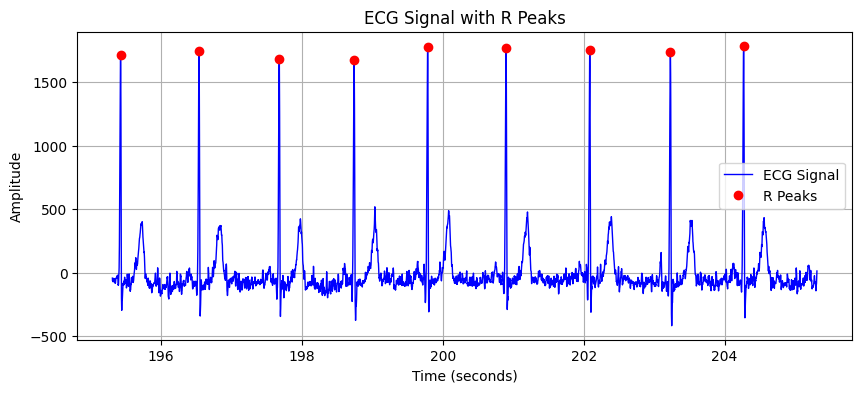

RR-Intervals: [1.11328125 1.140625   1.06054688 1.04492188 1.11328125 1.18554688
 1.14453125 1.0390625 ]
HRV_MeanNN: 1.105224609375


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


time_seconds = np.arange(len(df_49)) / 512

start_sample = 100000
end_sample = start_sample + 10*512
start_time_seconds = start_sample / 512
end_time_seconds = end_sample / 512

ecg_signal = df_49['ECG'][start_sample:end_sample].values

plt.figure(figsize=(10, 4))
plt.plot(np.arange(start_time_seconds, end_time_seconds, 1/512), ecg_signal, lw=1, color='b', label='ECG Signal')

peaks, _ = find_peaks(ecg_signal, height=600)

plt.plot(np.arange(start_time_seconds, end_time_seconds, 1/512)[peaks], ecg_signal[peaks], 'ro', label='R Peaks')

rr_intervals = np.diff(np.arange(start_time_seconds, end_time_seconds, 1/512)[peaks])

hrv_meannn = np.mean(rr_intervals)

plt.title('ECG Signal with R Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

print(f'RR-Intervals: {rr_intervals}')
print(f'HRV_MeanNN: {hrv_meannn}')



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

sfreq = raw_49.info["sfreq"]

max_start_sample =  len(df_49) - 300 * sfreq


time_seconds = np.arange(len(df_49)) / sfreq

start_sample = 13100
#np.random.randint(0, max_start_sample) start_sample + 300*sfreq
end_sample = 13150
start_sample = int(start_sample)
end_sample = int(end_sample)

start_time_seconds = start_sample / sfreq
end_time_seconds = end_sample / sfreq

ecg_signal = df_49['ECG'][start_sample:end_sample].values

plt.figure(figsize=(10, 4))
plt.plot(np.arange(start_time_seconds, end_time_seconds, 1/sfreq), ecg_signal, lw=1, color='b', label='ECG Signal')

peaks, _ = find_peaks(ecg_signal, height=800)

plt.plot(np.arange(start_time_seconds, end_time_seconds, 1/sfreq)[peaks], ecg_signal[peaks], 'ro', label='R Peaks')

rr_intervals = np.diff(np.arange(start_time_seconds, end_time_seconds, 1/sfreq)[peaks])

plt.title('ECG Signal with R Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
print(rr_intervals)
rr_intervals_ms = np.array(rr_intervals) * 1000

[1.75781250e-02 9.92187500e-01 6.05859375e+00 ... 1.77734375e-01
 1.69941406e+01 2.27167969e+01]


In [ ]:
print(len(rr_intervals))
rr_intervals_ms = np.array(rr_intervals) * 1000

2039


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(rr_intervals, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of RR Intervals')
plt.xlabel('RR Intervals (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
### TIME ANALYSES in seconds
hrv_meannn = np.mean(rr_intervals_ms)
########
hrv_sdnn = np.std(rr_intervals_ms)
################
segment_duration_seconds = 60
average_rr_intervals = []
for i in range(0, len(rr_intervals_ms), int(segment_duration_seconds )):
    segment_rr_intervals = rr_intervals_ms[i:i + int(segment_duration_seconds)]
    if len(segment_rr_intervals) > 0:
      average_rr = np.mean(segment_rr_intervals)
      average_rr_intervals.append(average_rr)
hrv_sdann1 = np.std(average_rr_intervals)

##########

successive_differences = np.diff(rr_intervals_ms)
squared_differences = successive_differences ** 2
mean_squared_differences = np.mean(squared_differences)
hrv_rmssd = np.sqrt(mean_squared_differences)

############
hrv_sdsd = np.std(successive_differences)
########################

hrv_cvnn = hrv_meannn/hrv_sdnn

########################

rms_successive_differences = np.sqrt(np.mean(successive_differences ** 2))
hrv_cvsd = rms_successive_differences / hrv_meannn

####
hrv_median_nn = np.median(rr_intervals_ms)

###################

absolute_deviations = np.abs(rr_intervals_ms - hrv_median_nn)
hrv_mad_nn = np.median(absolute_deviations)

##############

hrv_mcvnn = hrv_mad_nn/hrv_median_nn

##################

q1 = np.percentile(rr_intervals_ms, 25)
q3 = np.percentile(rr_intervals_ms, 75)
hrv_iqr_nn = q3 - q1

###################

count_pnn50 = np.sum(rr_intervals_ms > 50)

total_rr_intervals = len(rr_intervals_ms)
pnn50 = (count_pnn50 / total_rr_intervals) * 100

###################

count_pnn20 = np.sum(rr_intervals_ms > 20)

total_rr_intervals = len(rr_intervals_ms)
pnn20 = (count_pnn20 / total_rr_intervals) * 100

#####################

hist, bins = np.histogram(rr_intervals_ms, bins='auto')
mode_bin = bins[np.argmax(hist)]
total_rr_intervals = len(rr_intervals_ms)
hti = total_rr_intervals / hist[np.argmax(hist)]



print(average_rr_intervals)

print(f'HRV_MeanNN: {hrv_meannn}')
print(f'HRV_SDNN: {hrv_sdnn}')
print(f'HRV_SDANN1: {hrv_sdann1}')
print(f'HRV_RMSSD: {hrv_rmssd}')
print(f'HRV_SDSD: {hrv_sdsd}')
print(f'HRV_CVNN: {hrv_cvnn}')
print(f'HRV_CVSD: {hrv_cvsd}')
print(f'HRV_MedianNN: {hrv_median_nn}')
print(f'HRV_MadNN: {hrv_mad_nn}')
print(f'HRV_MCVNN: {hrv_mcvnn}')
print(f'HRV_IQRNN: {hrv_iqr_nn}')
print(f'HRV_pNN50: {pnn50}%')
print(f'HRV_pNN50: {pnn20}%')
print(f'HRV_HTI: {hti}')




[1044.4661458333333, 988.8671875, 978.3203125, 1022.94921875, 1022.4958147321429]
HRV_MeanNN: 1011.2700591216217
HRV_SDNN: 119.51756392789707
HRV_SDANN1: 24.29758414045728
HRV_RMSSD: 83.28613841406408
HRV_SDSD: 83.28611709842303
HRV_CVNN: 8.461267330814271
HRV_CVSD: 0.08235795934313088
HRV_MedianNN: 1047.8515625
HRV_MadNN: 55.6640625
HRV_MCVNN: 0.05312208760484623
HRV_IQRNN: 131.34765625
HRV_pNN50: 100.0%
HRV_pNN50: 100.0%
HRV_HTI: 3.8947368421052633


In [ ]:
## https://www.kaggle.com/code/stetelepta/exploring-heart-rate-variability-using-python/notebook

from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

x = np.cumsum(rr_intervals_ms) /1000
f = interp1d(x, rr_intervals_ms, kind='cubic')

fs = 4.0
steps = 1 / fs


xx = np.arange(1, np.max(x), steps)
rr_interpolated = f(xx)

print(rr_interpolated)

[920.26463918 919.70075933 917.20518192 ... 934.47808467 932.20975408
 924.8589103 ]


In [ ]:
def frequency_domain(rri, fs=4):
    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    total_power = vlf + lf + hf

    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    results = {}
    results['Power VLF (ms2)'] = vlf
    results['Power LF (ms2)'] = lf
    results['Power HF (ms2)'] = hf

    results['LF/HF'] = (lf/hf)
    results['LF/total_power'] = (lf/total_power)
    results['HF/total_power'] = (hf/total_power)
    return results, fxx, pxx





In [ ]:
print("Frequency domain metrics:")
results, fxx, pxx = frequency_domain(rr_interpolated)

for k, v in results.items():
    print("- %s: %.2f" % (k, v))

Frequency domain metrics:
- Power VLF (ms2): 243.26
- Power LF (ms2): 544.89
- Power HF (ms2): 694.18
- LF/HF: 0.78
- LF/total_power: 0.37
- HF/total_power: 0.47


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_ecg_video(data, sfreq):
    video_duration = 50  # 50 seconds
    interval_ms = 34  # 30 milliseconds
    window_duration = 2  # The duration of the displayed window in seconds
    num_frames = int((video_duration * 1000) / interval_ms)

    def update(frame):
        start_sample = int(frame * (sfreq * interval_ms / 1000))
        end_sample = int(start_sample + sfreq * window_duration)
        time_seconds = np.linspace(start_sample / sfreq, end_sample / sfreq, end_sample - start_sample)

        plt.clf()
        plt.plot(time_seconds, data[0, start_sample:end_sample])
        plt.xlabel('Time (seconds)')
        plt.ylabel('ECG Signal')
        plt.title('ECG Signal')
        plt.grid(True)

    fig = plt.figure(figsize=(10, 4))
    ani = FuncAnimation(fig, update, frames=num_frames, interval=interval_ms)

    ani.save('ecg_video_final.mp4', writer='ffmpeg', fps=7)
    plt.close()
    print("Video saved as 'ecg_video_final.mp4'")

# Example usage:
sfreq = 512  # Replace with your actual sampling frequency
data = np.random.randn(1, sfreq * 50)  # Replace with your actual ECG data
create_ecg_video(data, sfreq)


In [ ]:
sfreq = raw.info["sfreq"]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


sfreq = raw.info['sfreq']


selected_chunk = data[0,1195000:1195800]

frequencies, psd = signal.periodogram(selected_chunk, fs=sfreq)

y_axis_lower_limit = 0.001

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd, color='b')
plt.title('Denoised Power Spectral Density (PSD) for Selected Chunk')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Denoised PSD (V^2/Hz)')

# Set the y-axis limits
plt.ylim(y_axis_lower_limit, max(psd))

plt.grid(True)
plt.show()

In [ ]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: ECG
 chs: 1 ECG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 512.0 Hz
>

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

sfreq = raw.info['sfreq']



N = len(df['ECG'])
amp = 2 * np.sqrt(2)
time = np.arange(N) / float(sfreq)
mod = 500 * np.cos(2 * np.pi * 0.25 * time)
carrier = amp * np.sin(2 * np.pi * 3000 * time + mod)
x = df['ECG']   # Use the 'ECG' column for ECG data

# Calculate the spectrogram and add a small constant to prevent division by zero
frequencies, times, Sxx = signal.spectrogram(x, fs=sfreq)
epsilon = 1e-10  # Small constant to prevent division by zero
Sxx = Sxx + epsilon

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='plasma')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()

In [ ]:
#PSD using Scipy Welch
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

#selected_chunk = data[0,1195000:1196024]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sfreq = raw_1.info['sfreq']

f_1, Pxx_den_1 = signal.welch(data_1[0], sfreq, nperseg=1024)
axs[0][0].semilogy(f_1, Pxx_den_1)
axs[0][0].set_xlabel('frequency [Hz] (Patient Number 0001)')
axs[0][0].set_ylabel('PSD [V**2/Hz]')

f_43, Pxx_den_43 = signal.welch(data_43[0], sfreq, nperseg=1024)
axs[0][1].semilogy(f_43, Pxx_den_43)
axs[0][1].set_xlabel('frequency [Hz] (Patient Number 0043)')
axs[0][1].set_ylabel('PSD [V**2/Hz]')
f_49, Pxx_den_49 = signal.welch(data_49[0], sfreq, nperseg=1024)
axs[1][0].semilogy(f_49, Pxx_den_49)
axs[1][0].set_xlabel('frequency [Hz] (Patient Number 0049)')
axs[1][0].set_ylabel('PSD [V**2/Hz]')

f_52, Pxx_den_52 = signal.welch(data_52[0], sfreq, nperseg=1024)
axs[1][1].semilogy(f_52, Pxx_den_52)
axs[1][1].set_xlabel('frequency [Hz] (Patient Number 0052)')
axs[1][1].set_ylabel('PSD [V**2/Hz]')

In [ ]:
import mne
import matplotlib.pyplot as plt
import numpy as np

# Create an MNE info object with 'ecg' channel type
info = mne.create_info(ch_names=['ECG'], sfreq=sfreq, ch_types=['ecg'])

# Create a RawArray object with your selected_chunk and info
raw_data = np.array([data[0]])

# Calculate the PSD using the Welch method
fmin, fmax = 0.0, sfreq
psd, freqs = mne.time_frequency.psd_array_welch(raw_data, sfreq=sfreq, fmin=fmin, fmax=fmax, n_fft=1024, n_overlap=0, verbose=False)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.semilogy(freqs, psd[0], color='b')
plt.title('Power Spectral Density (PSD) for Selected Chunk (Welch Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')

# Set the y-axis limits
y_axis_lower_limit = 0.1
plt.ylim(y_axis_lower_limit, np.max(psd[0]))

plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming you have loaded your time series data into 'data'
acorr = sm.tsa.acf(data[0])


max_lags = len(acorr) - 1

# Plot the ACF for all available lags
plot_acf(acorr, lags=max_lags)
plt.ylim(-0.70,1.20)
plt.show()

In [ ]:
print(len(acorr))

72


In [ ]:
import numpy as np
min(10 * np.log10(15216640), 15216640 // 2 - 1)

71.82318766064368